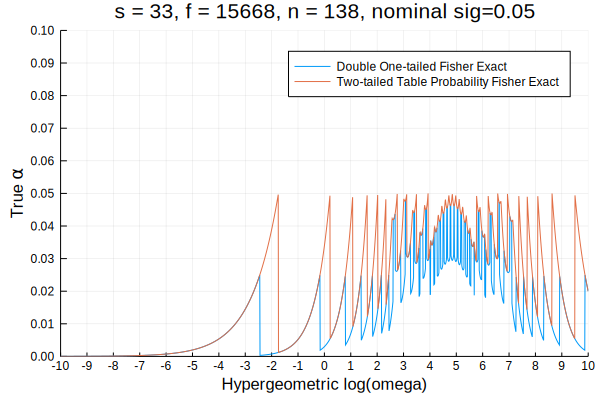

In [49]:
using Distributions, Plots
function calc_prob_when_significant(dist_hyp, y, sig, uplimit)
    prob_hyp = pdf(dist_hyp, y)   
    pval_double_one_tailed = min(1, 2*min(cdf(dist_hyp, y), 1-cdf(dist_hyp, y-1))) #2倍の片側p値
    prob_sig_double_one_tailed = ifelse(pval_double_one_tailed <= sig, prob_hyp, 0)
    pval_two_tailed = reduce(+, filter(x -> (isapprox(x, prob_hyp)) | (x < prob_hyp), map((x)-> pdf(dist_hyp, x), 0:uplimit)))
    prob_sig_two_tailed = ifelse( pval_two_tailed <= sig, prob_hyp, 0)
    return [prob_sig_double_one_tailed, prob_sig_two_tailed]
end

a_logω = [k for k in -10:0.01:10]
#s = 7; f = 35; n = 19; sig = 0.05
s = 33; f = 15668; n = 138; sig = 0.05

prob = map((logω)-> reduce(+, [calc_prob_when_significant(FisherNoncentralHypergeometric(s, f, n, exp(logω)), y, sig, min(s, n)) for y in 0:min(s,n)]), a_logω)
p = plot(a_logω, map((x)->x[1], prob), title="s = $s, f = $f, n = $n, nominal sig=$sig", label="Double One-tailed Fisher Exact",
        xaxis = ("Hypergeometric log(omega)", (-10, 10), -10:1:10),   
        yaxis = ("True \\alpha", (0.00, 0.10), 0:0.01:0.10),
        size = (600, 400))
    plot!(p, a_logω, map((x)->x[2], prob), label="Two-tailed Table Probability Fisher Exact")

In [ ]:
FisherNoncentralHypergeometric